##  freeCodeCamp Forum Page Views Analysis

###  Project Overview
In this project, we visualize **time series data** from the freeCodeCamp.org forum, showing the number of page views per day between **2016-05-09** and **2019-12-03**.  

###  Dataset
- **Source**: freeCodeCamp.org forum analytics  
- **Range**: May 9, 2016 → December 3, 2019  
- **Variable**: Daily page views  

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## **Data Cleaning**

In [15]:
# load the dataset of forum in freecodecamp
df = pd.read_csv("Dataset/fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [16]:
# show information about the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [17]:
# change data type to datetime
df["date"] = pd.to_datetime(df["date"])

In [18]:
# check for null values
df.isnull().sum()

date     0
value    0
dtype: int64

In this case the day when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset are fliltering.

In [19]:
# Clean data
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))]

In [26]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, ax=ax, legend=False)

    # Save image and return fig 
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Years"] = df_bar["date"].dt.year
    df_bar["Months"] = df_bar["date"].dt.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
    df_bar = df_bar.rename(columns={"value": "Average Page Views"})
    df_bar = df_bar.reset_index()
    missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

    # Save image and return fig 
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots 
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(32,10))
    fig, axes = plot_objects
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")
    
    # Save image and return fig 
    fig.savefig('box_plot.png')
    return fig

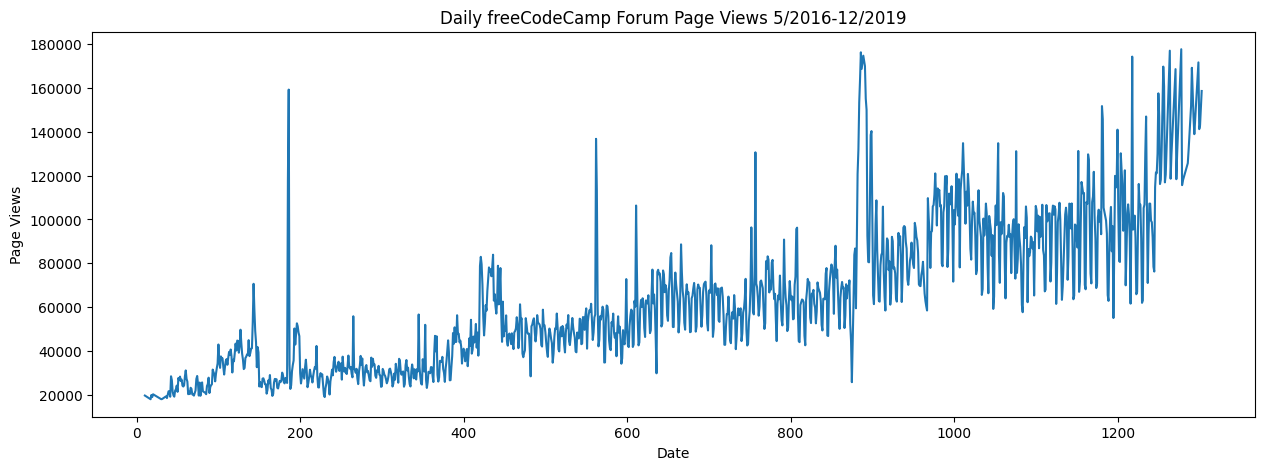

In [28]:
figure_1 = draw_line_plot()

Shows daily page views over the full time range in days over the years. There is a growing trend to interact in this forum.

/tmp/ipykernel_44099/3481705864.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


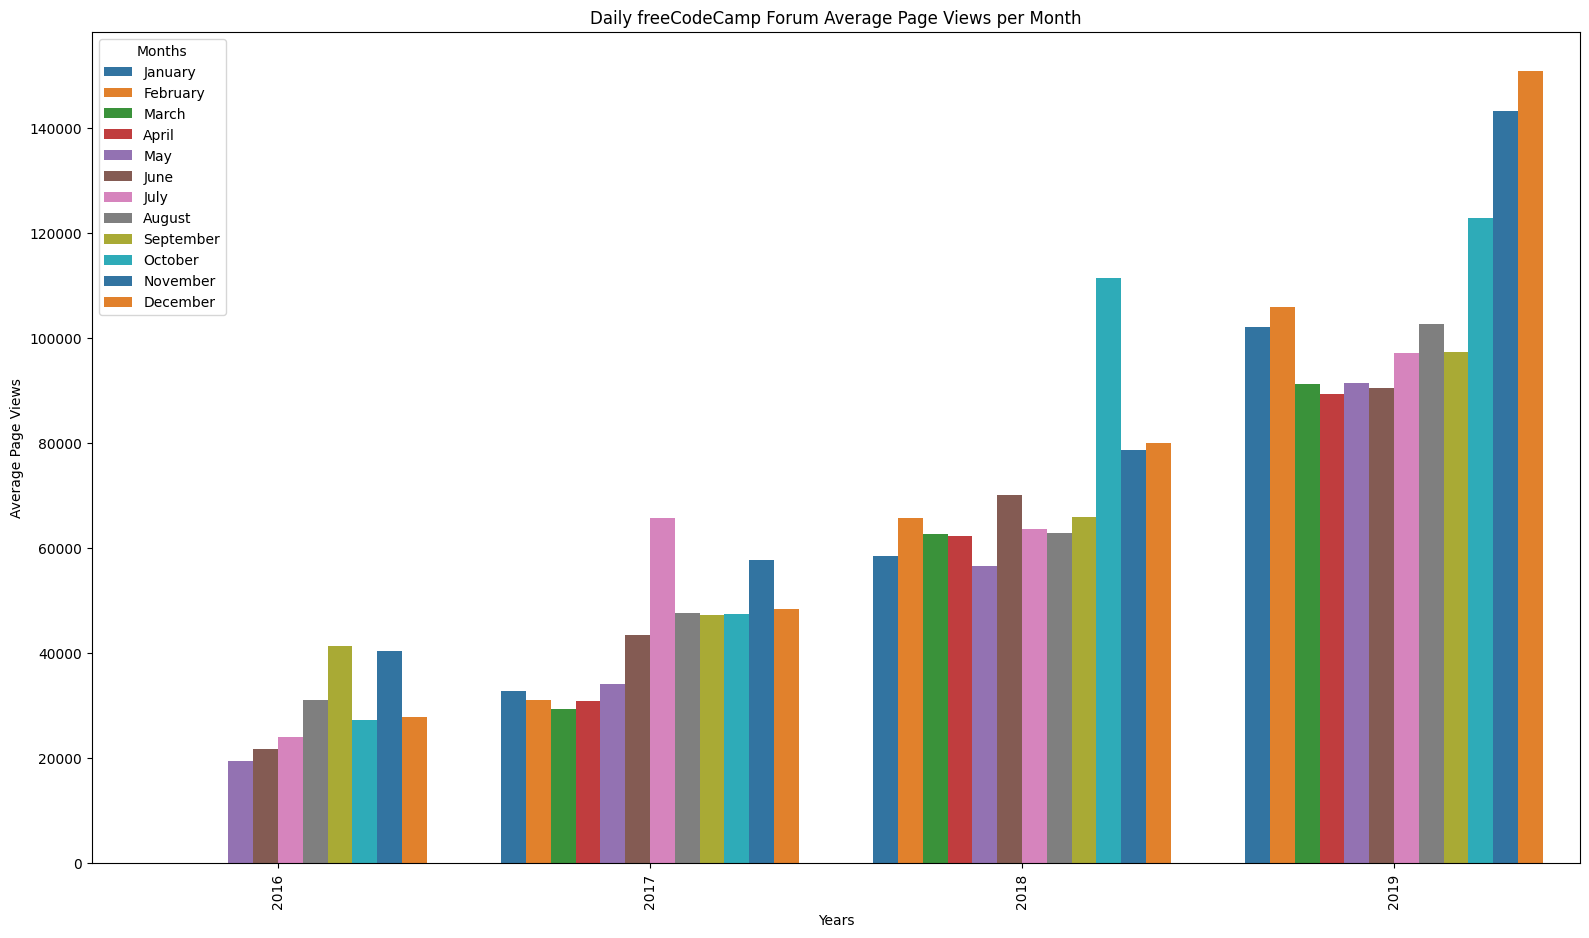

In [30]:
figure_2 = draw_bar_plot()

This graph show again growing trend to interact in this forum. Also highlights growth across years and differences between months.

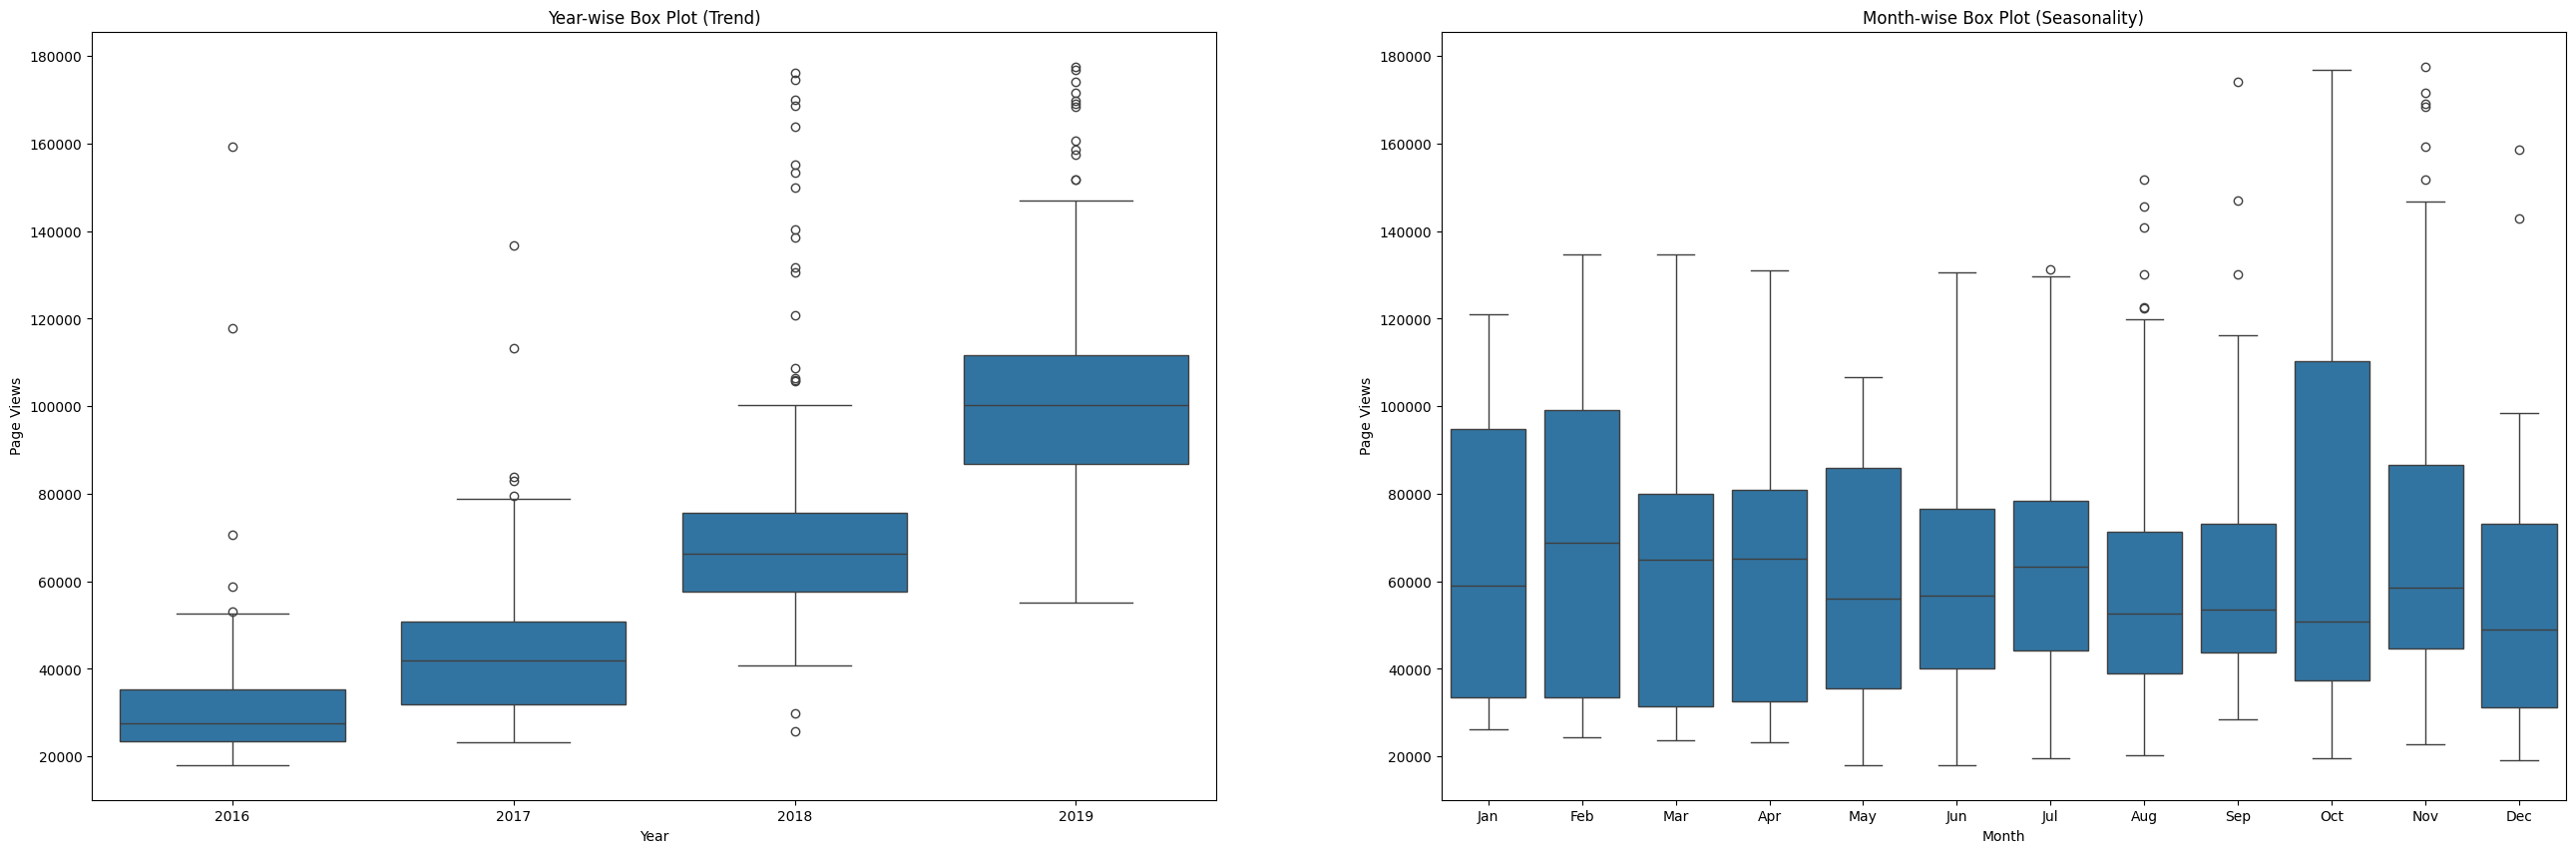

In [31]:
figure_3 = draw_box_plot()

The **box plots** reveal seasonal fluctuations and variability in forum activity. By year but also by month. 